## Main concept:
* Interactive with file / database
* Cleaning, munging, combining, normalizing, reshaping, slicing and dicing, andtransforming data for analysis
* Tranformation: group data sets to new dataset.
* Modeling and computation
* Create static / graphic visualization.

# 1. Iteractive with file / database: Read and write 

### Read file

In [1]:
path = 'data/data_facebook_sample.json'

In [2]:
open(path).read()

'{\n   "data": [\n      {\n         "id": "X999_Y999",\n         "from": {\n            "name": "Tom Brady", "id": "X12"\n         },\n         "message": "Looking forward to 2010!",\n         "actions": [\n            {\n               "name": "Comment",\n               "link": "http://www.facebook.com/X999/posts/Y999"\n            },\n            {\n               "name": "Like",\n               "link": "http://www.facebook.com/X999/posts/Y999"\n            }\n         ],\n         "type": "status",\n         "created_time": "2010-08-02T21:27:44+0000",\n         "updated_time": "2010-08-02T21:27:44+0000"\n      },\n      {\n         "id": "X998_Y998",\n         "from": {\n            "name": "Peyton Manning", "id": "X18"\n         },\n         "message": "Where\'s my contract?",\n         "actions": [\n            {\n               "name": "Comment",\n               "link": "http://www.facebook.com/X998/posts/Y998"\n            },\n            {\n               "name": "Like",\n     

### Convert string json to dictionary object

In [3]:
import json
path = 'data/data_facebook_sample.json'
data = open(path).read()
records = json.loads(data)

### Write data to file

In [4]:
file = open('filename', 'w')
file.write('abc')
file.close()

### Read data line by line

In [5]:
import json
path_usa = "data/usa_gov_data.txt"
records = [json.loads(line) for line in open(path_usa)]

In [6]:
records

[{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  u'al': u'en-US,en;q=0.8',
  u'c': u'US',
  u'cy': u'Danvers',
  u'g': u'A6qOVH',
  u'gr': u'MA',
  u'h': u'wfLQtf',
  u'hc': 1331822918,
  u'hh': u'1.usa.gov',
  u'l': u'orofrog',
  u'll': [42.576698, -70.954903],
  u'nk': 1,
  u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  u't': 1331923247,
  u'tz': u'America/New_York',
  u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'},
 {u'a': u'GoogleMaps/RochesterNY',
  u'c': u'US',
  u'cy': u'Provo',
  u'g': u'mwszkS',
  u'gr': u'UT',
  u'h': u'mwszkS',
  u'hc': 1308262393,
  u'hh': u'j.mp',
  u'l': u'bitly',
  u'll': [40.218102, -111.613297],
  u'nk': 0,
  u'r': u'http://www.AwareMap.com/',
  u't': 1331923249,
  u'tz': u'America/Denver',
  u'u': u'http://www.monroecounty.gov/etc/911/rss.php'},
 {u'a': u'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NE

# 2. Interact with data: counting, cleaning, munging, combining, normalizing, reshaping, slicing and dicing, and transforming data for analysis

## Counting data
URL shortening service bit.ly partnered with the United States governmentwebsite usa.gov to provide a feed of anonymous data gathered from users who shortenlinks ending with .gov or .mil

In that data, each record contain infomation about timezone of user who shortenlinks. 

#### Pure python
In python, *list comprehension* is the way to apply an operation like **json.loads** to a collection of strings or other object 

In [7]:
records = [json.loads(line) for line in open(path_usa)]
timezones = [rec['tz'] for rec in records if 'tz' in rec]

In [8]:
timezones

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'',
 u'America/Los_Angeles',
 u'America/New_York',
 u'America/New_York',
 u'America/New_York',
 u'Asia/Hong_Kong',
 u'Asia/Hong_Kong',
 u'America/New_York',
 u'America/Denver',
 u'Europe/Rome',
 u'Africa/Ceuta',
 u'America/New_York',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Madrid',
 u'Asia/Kuala_Lumpur',
 u'Asia/Nicosia',
 u'America/Sao_Paulo',
 u'',
 u'',
 u'Europe/London',
 u'America/New_York',
 u'Pacific/Honolulu',
 u'America/Chicago',
 u'',
 u'',
 u'Pacific/Honolulu',
 u'',
 u'America/New_York',
 u'America/New_York',
 u'America/New_York',
 u'America/Chicago',
 u'Europe/Rome',
 u'America/New_York',
 u'America/New_York',
 u'America/Los_Angeles',
 u'',
 u'',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Malta',
 u'America/New_York',
 u'America/New_York',
 u'',
 u'America/Los_Angeles',
 u'America/Sao_Pa

In [9]:
def get_counts(sequence):
  counts = {}
  for x in sequence:
    if (x in counts):
      counts[x] = counts[x] + 1
    else:
      counts[x] = 1
  return counts
counts = get_counts(timezones)

In [10]:
counts

{u'': 521,
 u'Africa/Cairo': 3,
 u'Africa/Casablanca': 1,
 u'Africa/Ceuta': 2,
 u'Africa/Johannesburg': 1,
 u'Africa/Lusaka': 1,
 u'America/Anchorage': 5,
 u'America/Argentina/Buenos_Aires': 1,
 u'America/Argentina/Cordoba': 1,
 u'America/Argentina/Mendoza': 1,
 u'America/Bogota': 3,
 u'America/Caracas': 1,
 u'America/Chicago': 400,
 u'America/Chihuahua': 2,
 u'America/Costa_Rica': 1,
 u'America/Denver': 191,
 u'America/Edmonton': 6,
 u'America/Guayaquil': 2,
 u'America/Halifax': 4,
 u'America/Indianapolis': 20,
 u'America/La_Paz': 1,
 u'America/Lima': 1,
 u'America/Los_Angeles': 382,
 u'America/Managua': 3,
 u'America/Mazatlan': 1,
 u'America/Mexico_City': 15,
 u'America/Monterrey': 1,
 u'America/Montevideo': 1,
 u'America/Montreal': 9,
 u'America/New_York': 1251,
 u'America/Phoenix': 20,
 u'America/Puerto_Rico': 10,
 u'America/Rainy_River': 25,
 u'America/Recife': 2,
 u'America/Santo_Domingo': 1,
 u'America/Sao_Paulo': 33,
 u'America/St_Kitts': 1,
 u'America/Tegucigalpa': 1,
 u'Ameri

#### Using standard python lib
Python provides us several libs to init the value of dictionary.

In [11]:
from collections import  defaultdict
def get_counts2(sequence):
  counts = defaultdict(int)
  for x in timezones:
    counts[x] = counts[x] + 1
  return counts

counts = get_counts(timezones)

In [12]:
counts

{u'': 521,
 u'Africa/Cairo': 3,
 u'Africa/Casablanca': 1,
 u'Africa/Ceuta': 2,
 u'Africa/Johannesburg': 1,
 u'Africa/Lusaka': 1,
 u'America/Anchorage': 5,
 u'America/Argentina/Buenos_Aires': 1,
 u'America/Argentina/Cordoba': 1,
 u'America/Argentina/Mendoza': 1,
 u'America/Bogota': 3,
 u'America/Caracas': 1,
 u'America/Chicago': 400,
 u'America/Chihuahua': 2,
 u'America/Costa_Rica': 1,
 u'America/Denver': 191,
 u'America/Edmonton': 6,
 u'America/Guayaquil': 2,
 u'America/Halifax': 4,
 u'America/Indianapolis': 20,
 u'America/La_Paz': 1,
 u'America/Lima': 1,
 u'America/Los_Angeles': 382,
 u'America/Managua': 3,
 u'America/Mazatlan': 1,
 u'America/Mexico_City': 15,
 u'America/Monterrey': 1,
 u'America/Montevideo': 1,
 u'America/Montreal': 9,
 u'America/New_York': 1251,
 u'America/Phoenix': 20,
 u'America/Puerto_Rico': 10,
 u'America/Rainy_River': 25,
 u'America/Recife': 2,
 u'America/Santo_Domingo': 1,
 u'America/Sao_Paulo': 33,
 u'America/St_Kitts': 1,
 u'America/Tegucigalpa': 1,
 u'Ameri

#### Using pandas
The main pandas data structure is the DataFrame, which you can think of as representing a table or spreadsheet of data.

In [13]:
from pandas import DataFrame, Series

In [14]:
import pandas as pd

In [15]:
frame = DataFrame(records)

In [16]:
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [17]:
frame['tz'][-10:]

3550       America/New_York
3551                       
3552        America/Chicago
3553       America/New_York
3554       America/New_York
3555       America/New_York
3556        America/Chicago
3557         America/Denver
3558    America/Los_Angeles
3559       America/New_York
Name: tz, dtype: object

**Pandas provide a function to count value. Such as:**

In [18]:
tz_counts = frame['tz'].value_counts()

In [19]:
tz_counts

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Indianapolis                20
America/Phoenix                     20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Stockholm                    14
Europe/Paris                        14
America/Vancouver                   12
Pacific/Auckland                    11
Europe/Prague                       10
Europe/Helsinki                     10
Asia/Hong_Kong                      10
America/Puerto_Rico      

## Cleaning and munging
In a dataset, there are some records are missed or unknown. Pandas can clean and mung them.
* using **fillna(<value>)** to fill missing value by other value

In [20]:
clean_tz = frame['tz'].fillna('Missing')

* replacing empty string. 

In [21]:
clean_tz[clean_tz == ''] = 'Unknown'

In [22]:
clean_tz

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
5          America/New_York
6             Europe/Warsaw
7                   Unknown
8                   Unknown
9                   Unknown
10      America/Los_Angeles
11         America/New_York
12         America/New_York
13                  Missing
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                  Unknown
29                  Unknown
               ...         
3530    America/Los_Angeles
3531                Unknown
3532       America/New_York
3533       America/New_York
3534        America/

In [23]:
tz_counts = clean_tz.value_counts()

In [24]:
tz_counts

America/New_York                  1251
Unknown                            521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Missing                            120
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Indianapolis                20
America/Phoenix                     20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Stockholm                    14
Europe/Paris                        14
America/Vancouver                   12
Pacific/Auckland                    11
Asia/Hong_Kong                      10
Europe/Prague                       10
Europe/Helsinki          

** Then we can using matplotlib to visualize timezone in a chart**

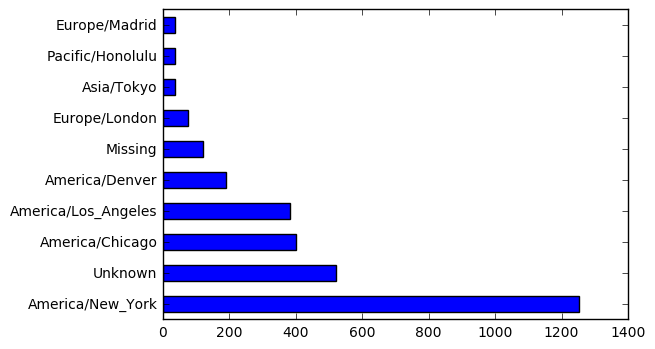

In [25]:
import matplotlib.pyplot as plt
tz_counts[:10].plot(kind='barh', rot=0)
plt.show()

## Combining data

In the data sample contain another information about the Browser and Operation System of user. They are shown in 'a'.

In [26]:
frame['a'][:10]

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7    Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8    Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

We want to get information about Browser and OS only. Then, we have to **split** each string, and get necessary info.

In [27]:
results = Series([x.split()[0] for x in frame.a.dropna()])

In [28]:
results[:10]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
5               Mozilla/5.0
6               Mozilla/5.0
7               Mozilla/5.0
8                Opera/9.80
9               Mozilla/5.0
dtype: object

We care about operating system is Windows or not. This code belows is to get records which does not have Null value in 'a'

In [29]:
cframe = frame[frame.a.notnull()]

In [30]:
cframe[:10]

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


Then, compute each row is Window or not

In [31]:
import numpy as np
os = np.where(cframe["a"].str.contains("Windows"), "Windows", "Not Windows")

In [32]:
os[:10]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows',
       'Windows', 'Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

** Merge is one of the common combining content.**

In [33]:
by_tz_os = cframe.groupby(['tz', os])
by_tz_os.size()

tz                                         
                                Not Windows    245
                                Windows        276
Africa/Cairo                    Windows          3
Africa/Casablanca               Windows          1
Africa/Ceuta                    Windows          2
Africa/Johannesburg             Windows          1
Africa/Lusaka                   Windows          1
America/Anchorage               Not Windows      4
                                Windows          1
America/Argentina/Buenos_Aires  Not Windows      1
America/Argentina/Cordoba       Windows          1
America/Argentina/Mendoza       Windows          1
America/Bogota                  Not Windows      1
                                Windows          2
America/Caracas                 Windows          1
America/Chicago                 Not Windows    115
                                Windows        285
America/Chihuahua               Not Windows      1
                                Window

Each row in DataFrame by_tz_os is showing in stack. To unstack using **unstack()**

In [34]:
agg_counts = by_tz_os.size().unstack()

In [35]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,NaN,3.0
Africa/Casablanca,NaN,1.0
Africa/Ceuta,NaN,2.0
Africa/Johannesburg,NaN,1.0
Africa/Lusaka,NaN,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,NaN
America/Argentina/Cordoba,NaN,1.0


Then fill NaN value by 0. Using **fillna(0)**

In [36]:
agg_counts.fillna(0)

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


*** I don't understand this code below ***

In [37]:
indexer = agg_counts.sum(1).argsort()
indexer

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
America/Bogota                    62
America/Caracas                   34
America/Chicago                   60
America/Chihuahua                 36
America/Costa_Rica                37
America/Denver                    27
America/Edmonton                  76
America/Guayaquil                 56
America/Halifax                   89
America/Indianapolis               2
America/La_Paz                     4
America/Lima                       5
America/Los_Angeles                7
America/Managua                    8
America/Mazatlan                   9
America/Mexico_City               86
America/Monterrey                 1

Then show the result to **barh** in stack option

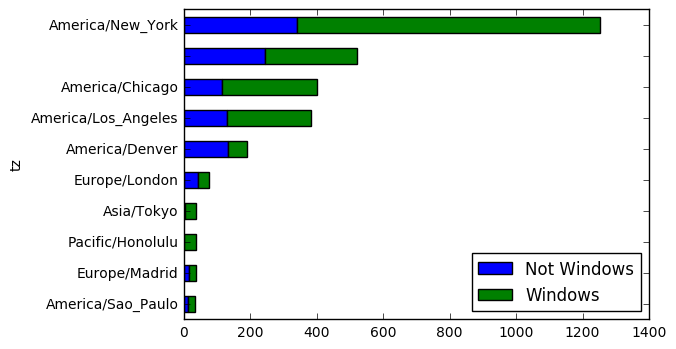

In [38]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset.plot(kind='barh', stacked='True', rot=0)
plt.show()

## Slicing and dicing
The MovieLens 1M data set contains 1 million ratings collected from 6000 users on4000 movies. It’s spread across 3 tables: ratings, user information, and movie infor-mation.
* users.dat

In [39]:
import pandas as pd
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('data/ml-1m/users.dat', sep='::', header=None, names=unames)
users

/home/khanhlq/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


* ratings.dat

In [40]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('data/ml-1m/ratings.dat', sep='::', header=None, names=rnames)
ratings

/home/khanhlq/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


* movies.dat

In [41]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('data/ml-1m/movies.dat', sep='::', header=None, names=mnames)
movies

/home/khanhlq/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


## Merging
 Analyzing the data spread across three tables is not a simple task, but it will be easier if they are merged in one table. 
 
 Using **pd.merge(table_a, table_b)**. **merge** function will join 2 DataFrame and remove the same column 

In [42]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [43]:
data.ix[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

## pivot_table
Now we want to get mean movie ratings for each film grouped by gender, we can use **pivot_gender** to do that.
References: 
* pivot_table in google spreadsheets example: [link](http://trendct.org/2015/09/04/tutorial-how-to-make-pivot-tables-in-google-sheets/)
* pivot_table in pandas example: [link](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html)

In [44]:
mean_ratings = pd.pivot_table(data, values='rating', index='title', columns='gender', aggfunc='mean')
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


Now we want to count number ratings of each film, then take which one has more than 250 times ratings of audiences.

First, we have to count the number ratings of each film by using **groupby(<'colum_name'>)**

In [45]:
ratings_by_title = data.groupby('title').size()
ratings_by_title

title
$1,000,000 Duck (1971)                              37
'Night Mother (1986)                                70
'Til There Was You (1997)                           52
'burbs, The (1989)                                 303
...And Justice for All (1979)                      199
1-900 (1994)                                         2
10 Things I Hate About You (1999)                  700
101 Dalmatians (1961)                              565
101 Dalmatians (1996)                              364
12 Angry Men (1957)                                616
13th Warrior, The (1999)                           750
187 (1997)                                          55
2 Days in the Valley (1996)                        286
20 Dates (1998)                                    139
20,000 Leagues Under the Sea (1954)                575
200 Cigarettes (1999)                              181
2001: A Space Odyssey (1968)                      1716
2010 (1984)                                        470
24 7

In [46]:
active_titles = ratings_by_title.index[ratings_by_title > 250]
active_titles

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)',
       u'101 Dalmatians (1961)', u'101 Dalmatians (1996)',
       u'12 Angry Men (1957)', u'13th Warrior, The (1999)',
       u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)',
       u'2001: A Space Odyssey (1968)', u'2010 (1984)',
       ...
       u'X-Men (2000)', u'Year of Living Dangerously (1982)',
       u'Yellow Submarine (1968)', u'You've Got Mail (1998)',
       u'Young Frankenstein (1974)', u'Young Guns (1988)',
       u'Young Guns II (1990)', u'Young Sherlock Holmes (1985)',
       u'Zero Effect (1998)', u'eXistenZ (1999)'],
      dtype='object', name=u'title', length=1214)

In [47]:
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


Now, we want to know the movies that are most divisive between male and female viewers. Easy way is to add a column which has value of differrent ratings, then sort by that column.

In [48]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sort_by_diff = mean_ratings.sort_index(by='diff')
sort_by_diff[::1][:15]

/home/khanhlq/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [49]:
sort_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


** You can see, each movies Female and Male has other sense, other feeling. That awesome! Human is totally awesome!!**

[?] We can measures the disagreement by standard deviation???

In [50]:
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title

title
$1,000,000 Duck (1971)                            1.092563
'Night Mother (1986)                              1.118636
'Til There Was You (1997)                         1.020159
'burbs, The (1989)                                1.107760
...And Justice for All (1979)                     0.878110
1-900 (1994)                                      0.707107
10 Things I Hate About You (1999)                 0.989815
101 Dalmatians (1961)                             0.982103
101 Dalmatians (1996)                             1.098717
12 Angry Men (1957)                               0.812731
13th Warrior, The (1999)                          1.140421
187 (1997)                                        1.057919
2 Days in the Valley (1996)                       0.921592
20 Dates (1998)                                   1.151943
20,000 Leagues Under the Sea (1954)               0.869685
200 Cigarettes (1999)                             1.111964
2001: A Space Odyssey (1968)                      

# US Baby Name 1880 - 2010
The United States Social Security Administration (SSA) has made available data on thefrequency of baby names from 1880 through the present.
There are many things you might want to do with the data set:
* Visualize the proportion of babies given a particular name (your own, or anothername) over time.
* Determine the relative rank of a name.
* Determine the most popular names in each year or the names with largest increasesor decreases.
* Analyze trends in names: vowels, consonants, length, overall diversity, changes inspelling, first and last letters
* Analyze  external  sources  of  trends:  biblical  names,  celebrities,  demographicchanges

In the data, we have a series of files like **yob1880.txt**. Each of them contains 3 column about: name, sex, and births.

Now, try to read one.

In [51]:
name1880 = pd.read_csv('data/names/yob1880.txt', names=['name', 'sex', 'births'])
name1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


Then, we can count how many boys and girls were born in 1880s. 

In [52]:
name1880.groupby('sex')['births'].sum()

sex
F     90992
M    110490
Name: births, dtype: int64

## Concat DataFrame
As we know, the data is separate into many files. So, in order to alnalys easier, we should concat them into one DataFrame. And pandas provides us method **concat([array_of_dataframes])**

In [53]:
columns = ['name', 'sex', 'births']

years = range(1880, 2015)
pieces = []
for year in years:
  path = 'data/names/yob%d.txt' % year
  df = pd.read_csv(path, names=columns)
  df['year'] = year
  pieces.append(df)

names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


We can already start aggregating the data at the year and sex level using groupby or **pivot_table**

In [54]:
total_births = pd.pivot_table(names, values = 'births', index='year', columns='sex', aggfunc=sum)
total_births

sex,F,M
year,,
1880,90992,110490
1881,91953,100743
1882,107848,113686
1883,112318,104627
1884,129020,114443
1885,133055,107799
1886,144534,110785
1887,145981,101415
1888,178624,120850


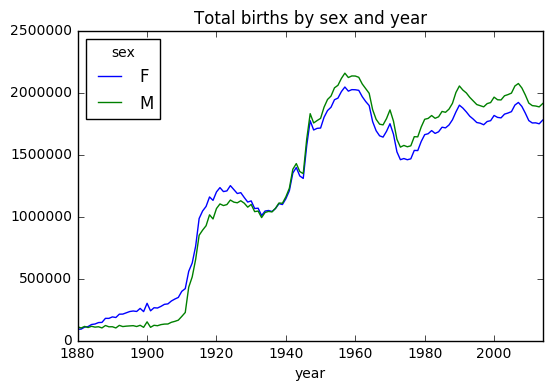

In [55]:
total_births.plot(title='Total births by sex and year')
plt.show()

Next, let’s insert a column prop (Proportion) with the fraction of babies given each name relative to the total number of births. A prop value of 0.02 would indicate that 2 out of every 100 babies was given a particular name. Thus, we group the data by year and sex, then addthe new column to each group:

** [?] Why in the first loop, the group argument in add_prop has double female value?? **

In [56]:
def add_prop(group):
  # Integer  Division floors
  births = group.births.astype(float)
  group['prop'] = births / births.sum()
  return group
names = names.groupby(['year','sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


Now we get top 1000 of each year/sex

In [76]:
def get_top1000(group):
  return group.sort_values(by='births', ascending=False)[:1000]
top1000 = names.groupby(['year', 'sex']).apply(get_top1000)
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077644
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021310
         4           Minnie   F    1746  1880  0.019189
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011485
         15          Martha   F    1040  1880  0.011430
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     796  1880  0.008748
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2014 M   1812683       Koen   M     215  2014  0.000113
         1812685       Mike   M     215  2014  0.000113
         1812684     Magnus   M     215  2014  0.000113
         1812682   Deangelo   M     215  2014  0.000113
         1812681  Broderick   M     215  2014  0.000113
         1812686      Bodie   M     214  2014  0.000112
         1812687      Dario   M     214  2014  0.000112
         1812688    Brayson   M     213  2014  0.000111
         1812689      Chace   M     213  2014  0.000111
         1812690    Jayvion   M     213  2014  0.000111
         1812691     Kaison   M     213  2014  0.000111
         1812692     Darien   M     212  2014  0.000111
         1812693     Teagan   M     212  2014  0.000111
         1812694   Valentin   M     212  2014  0.000111
         1812695    Bridger   M     211  2014  0.000110
         1812696   Menachem   M     211  2014  0.000110
         1812698      Rocky   M     210  2014  0.000110
         1812697      Kylen   M     210  2014  0.000110
         1812700     Foster   M     209  2014  0.000109
         1812701     Howard   M     209  2014  0.000109
         1812702     Maddux   M     209  2014  0.000109
         1812699      Boden   M     209  2014  0.000109
         1812703       Jair   M     208  2014  0.000109
         1812704    Osvaldo   M     208  2014  0.000109
         1812705       Ayan   M     207  2014  0.000108
         1812706        Ean   M     207  2014  0.000108
         1812707    Reyansh   M     207  2014  0.000108
         1812708      Tyree   M     207  2014  0.000108
         1812710      Rylen   M     206  2014  0.000108
         1812711     Sutton   M     206  2014  0.000108

[269877 rows x 5 columns]

# Alalyzing name trends

In [77]:
boys = top1000[top1000.sex == 'M']
boys

name sex  births  year      prop
year sex                                               
1880 M   942           John   M    9655  1880  0.087383
         943        William   M    9531  1880  0.086261
         944          James   M    5927  1880  0.053643
         945        Charles   M    5348  1880  0.048403
         946         George   M    5126  1880  0.046393
         947          Frank   M    3242  1880  0.029342
         948         Joseph   M    2632  1880  0.023821
         949         Thomas   M    2534  1880  0.022934
         950          Henry   M    2444  1880  0.022120
         951         Robert   M    2415  1880  0.021857
         952         Edward   M    2364  1880  0.021396
         953          Harry   M    2152  1880  0.019477
         954         Walter   M    1755  1880  0.015884
         955         Arthur   M    1599  1880  0.014472
         956           Fred   M    1569  1880  0.014200
         957         Albert   M    1493  1880  0.013513
         958         Samuel   M    1024  1880  0.009268
         959          David   M     869  1880  0.007865
         960          Louis   M     828  1880  0.007494
         961            Joe   M     731  1880  0.006616
         962        Charlie   M     730  1880  0.006607
         963       Clarence   M     730  1880  0.006607
         964        Richard   M     728  1880  0.006589
         965         Andrew   M     644  1880  0.005829
         966         Daniel   M     643  1880  0.005820
         967         Ernest   M     615  1880  0.005566
         968           Will   M     588  1880  0.005322
         969          Jesse   M     569  1880  0.005150
         970          Oscar   M     544  1880  0.004924
         971          Lewis   M     517  1880  0.004679
...                     ...  ..     ...   ...       ...
2014 M   1812683       Koen   M     215  2014  0.000113
         1812685       Mike   M     215  2014  0.000113
         1812684     Magnus   M     215  2014  0.000113
         1812682   Deangelo   M     215  2014  0.000113
         1812681  Broderick   M     215  2014  0.000113
         1812686      Bodie   M     214  2014  0.000112
         1812687      Dario   M     214  2014  0.000112
         1812688    Brayson   M     213  2014  0.000111
         1812689      Chace   M     213  2014  0.000111
         1812690    Jayvion   M     213  2014  0.000111
         1812691     Kaison   M     213  2014  0.000111
         1812692     Darien   M     212  2014  0.000111
         1812693     Teagan   M     212  2014  0.000111
         1812694   Valentin   M     212  2014  0.000111
         1812695    Bridger   M     211  2014  0.000110
         1812696   Menachem   M     211  2014  0.000110
         1812698      Rocky   M     210  2014  0.000110
         1812697      Kylen   M     210  2014  0.000110
         1812700     Foster   M     209  2014  0.000109
         1812701     Howard   M     209  2014  0.000109
         1812702     Maddux   M     209  2014  0.000109
         1812699      Boden   M     209  2014  0.000109
         1812703       Jair   M     208  2014  0.000109
         1812704    Osvaldo   M     208  2014  0.000109
         1812705       Ayan   M     207  2014  0.000108
         1812706        Ean   M     207  2014  0.000108
         1812707    Reyansh   M     207  2014  0.000108
         1812708      Tyree   M     207  2014  0.000108
         1812710      Rylen   M     206  2014  0.000108
         1812711     Sutton   M     206  2014  0.000108

[134997 rows x 5 columns]

In [78]:
girls = top1000[top1000.sex == 'F']
girls

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077644
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021310
         4           Minnie   F    1746  1880  0.019189
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011485
         15          Martha   F    1040  1880  0.011430
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     796  1880  0.008748
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2014 F   1793531  Magdalena   F     273  2014  0.000154
         1793532      Pyper   F     273  2014  0.000154
         1793533      Abril   F     272  2014  0.000153
         1793534    Antonia   F     272  2014  0.000153
         1793535   Jocelynn   F     272  2014  0.000153
         1793536     Landry   F     272  2014  0.000153
         1793537     Moriah   F     272  2014  0.000153
         1793538      Kylah   F     271  2014  0.000152
         1793539      Ryann   F     271  2014  0.000152
         1793543    Kailani   F     270  2014  0.000152
         1793545      Tamia   F     270  2014  0.000152
         1793544    Rosalyn   F     270  2014  0.000152
         1793542    Ireland   F     270  2014  0.000152
         1793540    Alaysia   F     270  2014  0.000152
         1793541    Annalee   F     270  2014  0.000152
         1793546        Aya   F     269  2014  0.000151
         1793547   Patience   F     269  2014  0.000151
         1793548        Kai   F     268  2014  0.000151
         1793549   Mercedes   F     268  2014  0.000151
         1793550      Micah   F     267  2014  0.000150
         1793551    Samiyah   F     267  2014  0.000150
         1793555      Paula   F     266  2014  0.000150
         1793556    Yaritza   F     266  2014  0.000150
         1793553   Cordelia   F     266  2014  0.000150
         1793554       Nala   F     266  2014  0.000150
         1793552      Aanya   F     266  2014  0.000150
         1793557     Neveah   F     264  2014  0.000149
         1793558      Belen   F     263  2014  0.000148
         1793559    Cambria   F     263  2014  0.000148
         1793560    Kaelynn   F     263  2014  0.000148

[134880 rows x 5 columns]

We can use **pivot_table** to form number of births by year and name

In [79]:
total_births = pd.pivot_table(top1000, values='births', index='year', columns='name', aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


Let's make some visualize to show the trend of some name through each year.

In [80]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn', 'Zoey']]
subset

name,John,Harry,Mary,Marilyn,Zoey
year,,,,,
1880,9701.0,2158.0,7092.0,NaN,NaN
1881,8795.0,2002.0,6948.0,NaN,NaN
1882,9597.0,2246.0,8178.0,NaN,NaN
1883,8934.0,2116.0,8044.0,NaN,NaN
1884,9428.0,2338.0,9253.0,NaN,NaN
1885,8801.0,2209.0,9166.0,NaN,NaN
1886,9074.0,2272.0,9921.0,NaN,NaN
1887,8166.0,2070.0,9935.0,NaN,NaN
1888,9299.0,2772.0,11804.0,NaN,NaN


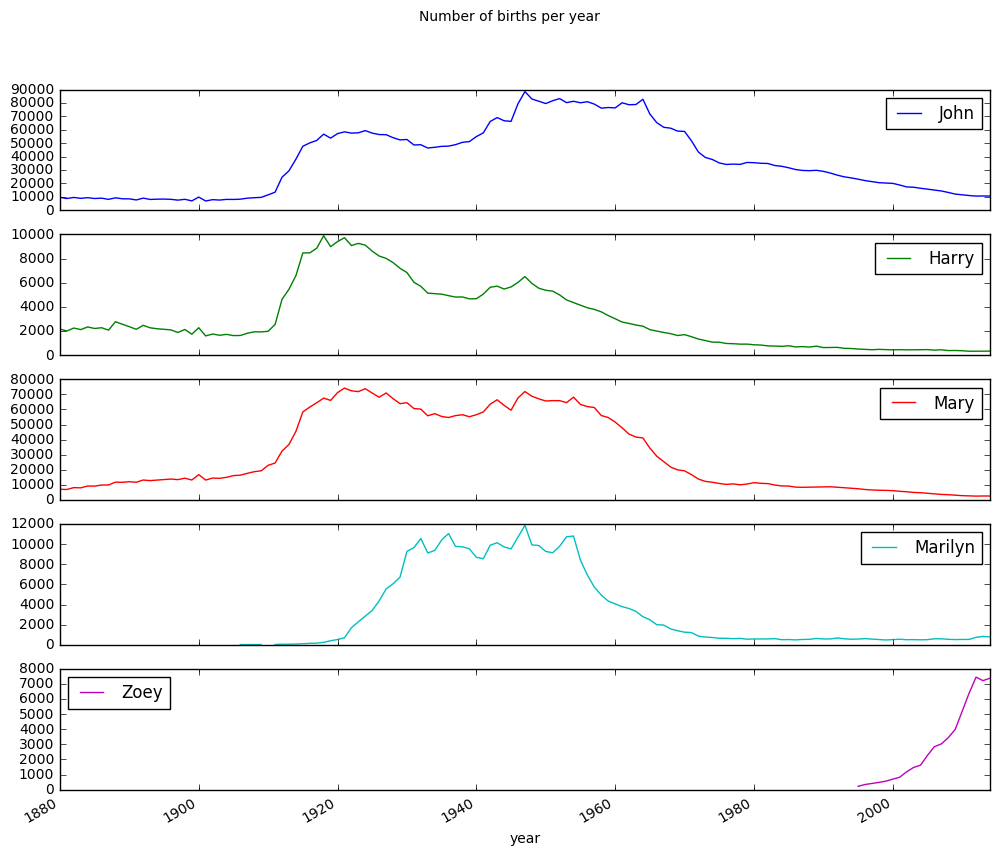

In [81]:
subset.plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year')
plt.show()

### Measuring the increase in naming diversity
One explanation for the decrease in plots above is that fewer parents are choosing common names for their children. This hypothesis can be explored and confirmed in the data. One measure is the proportion of births represented by the top 1000 mostpopular names, which I aggregate and plot by year and sex:

In [82]:
table = pd.pivot_table(top1000, values='prop', index='year', columns='sex', aggfunc=sum )
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
1885,0.992251,0.995501
1886,0.989504,0.995035
1887,0.988279,0.996697
1888,0.984241,0.992429


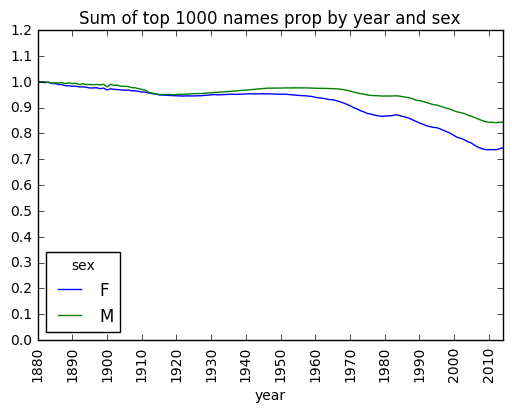

In [83]:
table.plot(title='Sum of top 1000 names prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10), rot = 90)
plt.show()

Now, we want to know how many most popular names can take 50%. We have **for, while** in our hand, we can do that, but NumPy has a method which helps us to do that more clever. **cumsum()** is cumulative sum 

In [86]:
df = boys[boys.year == 2010]
df

name sex  births  year      prop
year sex                                                 
2010 M   1677509        Jacob   M   22095  2010  0.011540
         1677510        Ethan   M   17993  2010  0.009398
         1677511      Michael   M   17324  2010  0.009048
         1677512       Jayden   M   17158  2010  0.008962
         1677513      William   M   17036  2010  0.008898
         1677514    Alexander   M   16746  2010  0.008746
         1677515         Noah   M   16438  2010  0.008585
         1677516       Daniel   M   15819  2010  0.008262
         1677517        Aiden   M   15520  2010  0.008106
         1677518      Anthony   M   15475  2010  0.008083
         1677519       Joshua   M   15425  2010  0.008056
         1677520        Mason   M   14836  2010  0.007749
         1677521  Christopher   M   14259  2010  0.007447
         1677522       Andrew   M   14227  2010  0.007431
         1677523        David   M   14176  2010  0.007404
         1677524      Matthew   M   14114  2010  0.007372
         1677525        Logan   M   14014  2010  0.007319
         1677526       Elijah   M   13875  2010  0.007247
         1677527        James   M   13861  2010  0.007240
         1677528       Joseph   M   13806  2010  0.007211
         1677529      Gabriel   M   12859  2010  0.006716
         1677530     Benjamin   M   12421  2010  0.006487
         1677531         Ryan   M   11964  2010  0.006249
         1677532       Samuel   M   11948  2010  0.006240
         1677533      Jackson   M   11812  2010  0.006169
         1677534         John   M   11543  2010  0.006029
         1677535       Nathan   M   11367  2010  0.005937
         1677536     Jonathan   M   11113  2010  0.005804
         1677537    Christian   M   11084  2010  0.005789
         1677538         Liam   M   10924  2010  0.005706
...                       ...  ..     ...   ...       ...
         1678480      Ronaldo   M     203  2010  0.000106
         1678481         Yair   M     203  2010  0.000106
         1678478         Kael   M     203  2010  0.000106
         1678482       Gibson   M     202  2010  0.000106
         1678483        Keyon   M     202  2010  0.000106
         1678484       Reagan   M     202  2010  0.000106
         1678485     Kingsley   M     201  2010  0.000105
         1678486        Talan   M     201  2010  0.000105
         1678487       Yehuda   M     201  2010  0.000105
         1678491       Jordon   M     200  2010  0.000104
         1678493        Slade   M     200  2010  0.000104
         1678492      Sheldon   M     200  2010  0.000104
         1678490       Daylen   M     200  2010  0.000104
         1678489      Dashawn   M     200  2010  0.000104
         1678488    Cristofer   M     200  2010  0.000104
         1678494     Clarence   M     199  2010  0.000104
         1678495        Kadin   M     199  2010  0.000104
         1678496        Masen   M     199  2010  0.000104
         1678497        Rowen   M     199  2010  0.000104
         1678498      Clinton   M     198  2010  0.000103
         1678499       Dillan   M     198  2010  0.000103
         1678500     Thaddeus   M     198  2010  0.000103
         1678501       Yousef   M     198  2010  0.000103
         1678502       Truman   M     197  2010  0.000103
         1678507       Joziah   M     196  2010  0.000102
         1678510       Simeon   M     196  2010  0.000102
         1678509       Reuben   M     196  2010  0.000102
         1678508      Keshawn   M     196  2010  0.000102
         1678504       Destin   M     196  2010  0.000102
         1678506        Enoch   M     196  2010  0.000102

[1000 rows x 5 columns]

In [87]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum

year  sex         
2010  M    1677509    0.011540
           1677510    0.020938
           1677511    0.029986
           1677512    0.038947
           1677513    0.047845
           1677514    0.056592
           1677515    0.065177
           1677516    0.073439
           1677517    0.081545
           1677518    0.089628
           1677519    0.097684
           1677520    0.105433
           1677521    0.112880
           1677522    0.120311
           1677523    0.127715
           1677524    0.135087
           1677525    0.142406
           1677526    0.149653
           1677527    0.156893
           1677528    0.164103
           1677529    0.170820
           1677530    0.177307
           1677531    0.183556
           1677532    0.189796
           1677533    0.195965
           1677534    0.201994
           1677535    0.207931
           1677536    0.213735
           1677537    0.219525
           1677538    0.225230
                        ...   
           1678479  

In [88]:
prop_cumsum.searchsorted(0.5)

array([116])

As we see, in 2010 it needs 116 most popular names to reach 50% of all name.
And now, let's look at 1900:

In [91]:
df = boys[boys.year == 1900]
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum.searchsorted(0.5)


array([24])

It needs only 24 most popular names to reach 50%!

Now, we will count quantile of the rest years.

In [101]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,[38],[14]
1881,[38],[14]
1882,[38],[15]
1883,[39],[15]
1884,[39],[16]


** [?] pyplot cannot show ndarray to visualize. Have to convert ndaraay to int64 **

In [102]:
diversity.plot(title='Number of popular names in top 50%')
plt.show()

TypeError: Empty 'DataFrame': no numeric data to plot

## The “Last letter” Revolution
In 2007, a baby name researcher Laura Wattenberg pointed out on her website (http://www.babynamewizard.com) that the distribution of boy names by final letter has changed significantly over the last 100 years. To see this, I first aggregate all of the births in the full data set by year, sex, and final letter:

In [103]:
# Extract the last letter from column name
get_last_letter = lambda x: x[-1]

In [109]:
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letters'
table = pd.pivot_table(names, values='births', index=last_letters, columns=['sex','year'], aggfunc=sum)
table

sex                 F                                                        \
year             1880     1881     1882     1883     1884     1885     1886   
last_letters                                                                  
a             31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                 NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d               609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e             33380.0  34080.0  40399.0  41912.0  48089.0  49616.0  53884.0   
f                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                 7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h              4863.0   4783.0   5566.0   5701.0   6602.0   6623.0   7146.0   
i                61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k                13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l              2541.0   2910.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m                58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n              3008.0   2959.0   3575.0   3836.0   4507.0   4735.0   5242.0   
o                30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r               481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s              1391.0   1316.0   1637.0   1794.0   2038.0   2127.0   2524.0   
t              2151.0   2165.0   2399.0   2554.0   2824.0   2889.0   3017.0   
u               380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                 NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                 NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y             10467.0  10404.0  12144.0  12063.0  13918.0  13927.0  14932.0   
z               106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                        ...            M            \
year             1887     1888     1889    ...         2005      2006   
last_letters                               ...                          
a             48942.0  59441.0  58631.0    ...      36886.0   36218.0   
b                 NaN      NaN      NaN    ...      43189.0   42655.0   
c                 NaN      NaN      NaN    ...      26108.0   26664.0   
d              1027.0   1298.0   1374.0    ...      50741.0   51480.0   
e             54352.0  66749.0  66662.0    ...     141256.0  143142.0   
f                 NaN      NaN      NaN    ...       1988.0    1970.0   
g                25.0     44.0     28.0    ...       1884.0    1932.0   
h              7141.0   8630.0   8825.0    ...      92608.0   98657.0   
i               105.0    141.0    134.0    ...      31359.0   33600.0   
j                 NaN      NaN      NaN    ...       1293.0    1244.0   
k                19.0     21.0     22.0    ...      42189.0   42582.0   
l              6174.0   7900.0   8395.0    ...     155462.0  156465.0   
m                90.0    123.0    137.0    ...      41646.0   42575.0   
n              5512.0   6832.0   7103.0    ...     686894.0  721803.0   
o                97.0    134.0    142.0    ...      92059.0   96414.0   
p                 NaN      NaN      NaN    ...       2769.0    2724.0   
q                 NaN      NaN      NaN    ...        447.0     431.0   
r               910.0   1207.0   1214.0    ...     172206.0  176670.0   
s              2803.0   3581.0   3569.0    ...     140047.0  143371.0   
t              3140.0   3816.0   3784.0    ...      43401.0   43599.0   
u               476.0    541.

Then, I select out three representative years spanning the history and print the first few rows:

In [110]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                  F                            M                    
year              1910      1960      2010     1910      1960      2010
last_letters                                                           
a             108398.0  691271.0  676151.0    977.0    5212.0   28837.0
b                  NaN     694.0     454.0    411.0    3912.0   39229.0
c                  5.0      49.0     954.0    482.0   15463.0   23325.0
d               6751.0    3728.0    2635.0  22113.0  262168.0   44780.0
e             133601.0  435056.0  316425.0  28665.0  178817.0  130130.0

Next, normalize the table by total births to compute a new table containing proportionof total births for each sex ending in each letter:

In [115]:
letter_prop = subtable / subtable.sum().astype(float)
letter_prop

sex                  F                             M                    
year              1910      1960      2010      1910      1960      2010
last_letters                                                            
a             0.273385  0.341854  0.381265  0.005030  0.002444  0.015061
b                  NaN  0.000343  0.000256  0.002116  0.001834  0.020489
c             0.000013  0.000024  0.000538  0.002482  0.007250  0.012183
d             0.017026  0.001844  0.001486  0.113858  0.122925  0.023388
e             0.336948  0.215148  0.178424  0.147593  0.083843  0.067966
f                  NaN  0.000010  0.000055  0.000783  0.004328  0.001206
g             0.000144  0.000157  0.000377  0.002260  0.009486  0.001407
h             0.051531  0.036222  0.075936  0.045568  0.037910  0.051800
i             0.001526  0.039966  0.031701  0.000844  0.000606  0.022662
j                  NaN       NaN  0.000092       NaN       NaN  0.000772
k             0.000121  0.000156  0.000355  0.036578  0.049377  0.018537
l             0.043188  0.033869  0.026387  0.065020  0.104894  0.070443
m             0.001200  0.008614  0.002598  0.058044  0.033829  0.024713
n             0.079235  0.130677  0.140079  0.143387  0.152536  0.362443
o             0.001672  0.002440  0.001246  0.017063  0.012834  0.042588
p             0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                  NaN       NaN  0.000030       NaN       NaN  0.000180
r             0.013392  0.006766  0.018047  0.064475  0.031043  0.087408
s             0.039039  0.012767  0.013341  0.130803  0.102725  0.065159
t             0.027432  0.015201  0.007845  0.072888  0.065654  0.022864
u             0.000683  0.000574  0.000417  0.000124  0.000057  0.001229
v                  NaN  0.000060  0.000117  0.000113  0.000037  0.001450
w             0.000020  0.000031  0.001189  0.006323  0.007710  0.016175
x             0.000015  0.000037  0.000730  0.003965  0.001851  0.008595
y             0.110975  0.152557  0.116768  0.077342  0.160967  0.058184
z             0.002436  0.000659  0.000700  0.000170  0.000184  0.001826

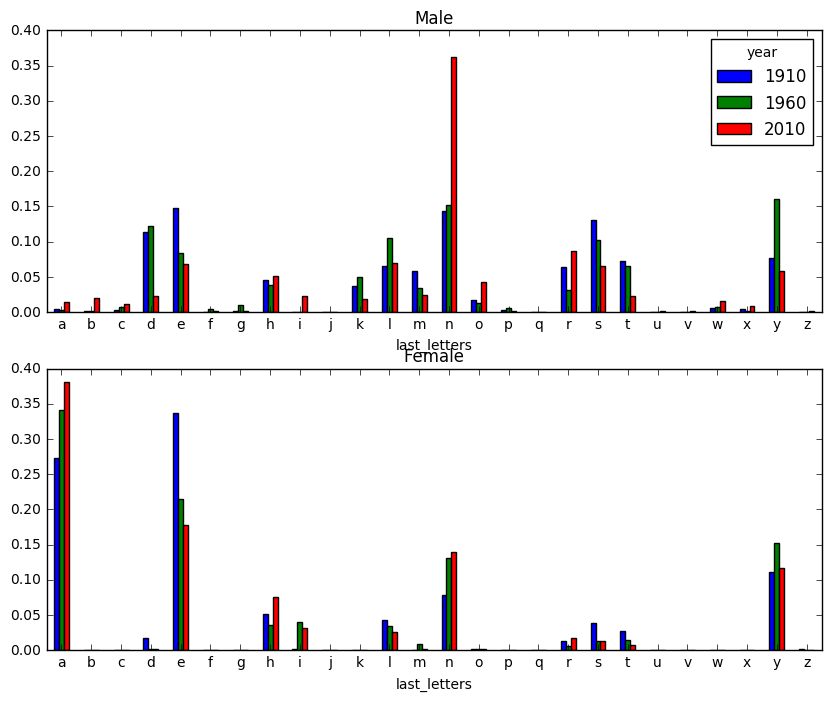

In [122]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)
plt.show()

Now, select 3 letter **d,n and y** and consider about their trend over time.


In [126]:
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.ix[['d','n','y'], 'M'].T
dny_ts

last_letters,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084051,0.151653,0.079148
1884,0.086121,0.149926,0.080407
1885,0.085474,0.146346,0.081884
1886,0.087647,0.149659,0.081681
1887,0.089070,0.148844,0.082867
1888,0.087712,0.151287,0.084923


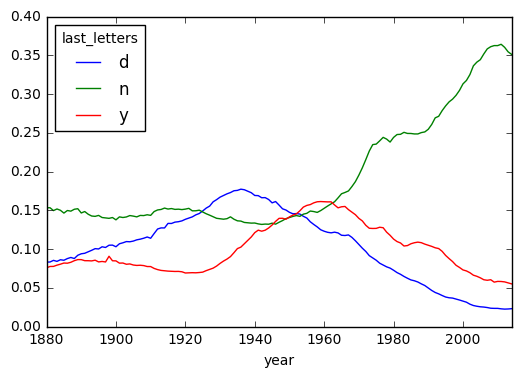

In [127]:
dny_ts.plot()
plt.show()

## Boy names that became girl names (and vice versa)

In [129]:
all_names = top1000.name.unique()
all_names

array(['Mary', 'Anna', 'Emma', ..., 'Boden', 'Ayan', 'Reyansh'], dtype=object)

In [132]:
mask = np.array(['lesl' in x.lower() for x in all_names])
mask

array([False, False, False, ..., False, False, False], dtype=bool)

In [133]:
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [134]:
filterd = top1000[top1000.name.isin(lesley_like)]
filterd.groupby('name').births.sum()

name
Leslee       993
Lesley     35032
Lesli        929
Leslie    375158
Lesly      11431
Name: births, dtype: int64

In [135]:
table = pd.pivot_table(filterd, values='births', index='year', columns='sex', aggfunc=sum)
table

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
1885,10.0,122.0
1886,8.0,136.0
1887,12.0,166.0
1888,23.0,175.0


In [136]:
table = table.div(table.sum(1), axis=0)
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
1885,0.075758,0.924242
1886,0.055556,0.944444
1887,0.067416,0.932584
1888,0.116162,0.883838


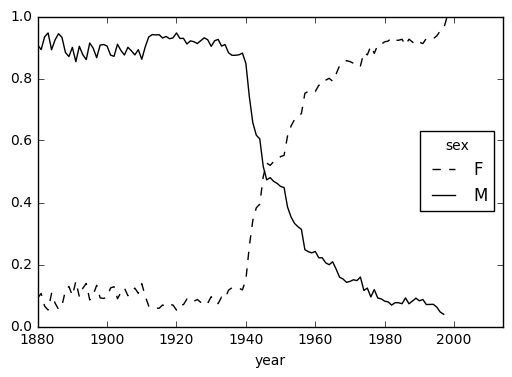

In [137]:
table.plot(style={'M': 'k-', 'F': 'k--'})
plt.show()